#
# Cardiovascular Disease Prediction by Machine Learning: Predictive Models and Optimization

<span style="color: #008800">Navid Azimi, Masoud Nateghi</span>

[Link to Dataset](https://www.kaggle.com/datasets/colewelkins/cardiovascular-disease/data)


The primary objective of this project is to predict the presence or absence of cardiovascular disease based on various patient metrics.

### Variables

- ***ID:*** Unique identifier for each patient.
- ***age:*** Age of the patient in days.
- ***age_years:*** Age of the patient in years (derived from age).
- ***gender:*** Gender of the patient. Categorical variable (1: Female, 2: Male).
- ***height:*** Height of the patient in centimeters.
- ***weight:*** Weight of the patient in kilograms.
- ***ap_hi:*** Systolic blood pressure.
- ***ap_lo:*** Diastolic blood pressure.
- ***cholesterol:*** Cholesterol levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
- ***gluc:*** Glucose levels. Categorical variable (1: Normal, 2: Above Normal, 3: Well Above Normal).
- ***smoke:*** Smoking status. Binary variable (0: Non-smoker, 1: Smoker).
- ***alco:*** Alcohol intake. Binary variable (0: Does not consume alcohol, 1: Consumes alcohol).
- ***active:*** Physical activity. Binary variable (0: Not physically active, 1: Physically active).
- ***cardio:*** Presence or absence of cardiovascular disease. Target variable. Binary (0: Absence, 1: Presence).
- ***bmi:*** Body Mass Index, derived from weight and height. Calculated as BMI = weight (kg) / height (m)^2.
- ***bp_category:*** Blood pressure category based on ap_hi and ap_lo. Categories include "Normal", "Elevated", "Hypertension Stage 1", "Hypertension Stage 2".
- ***bp_category_encoded:*** Encoded form of bp_category for machine learning purposes.


---

# Importing Libraries

In [880]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

---

# Data Preprocessing

#### ◉ Importing the Dataset

First we ensure that non-standard representations of missing values are correctly identified and treated as NaN (Not a Number) during the data reading process. Additionally, we will remove columns that are deemed unnecessary for further analysis, resulting in a more focused and cleaned DataFrame.

##### Steps:

1. **Listing Non-Standard Representations for Missing Values:**
- A list named `non_standard_missing_values` is created, containing various representations that might indicate missing values in the dataset. Examples include '?', '--', ' ', 'NA', 'N/A', and '-'. These values are commonly used to denote missing or undefined data in datasets but are not recognized as standard NaN representations.

2. **Reading Data from a CSV File into a Pandas DataFrame:**
- The pandas library is utilized to read data from a CSV file named 'cardio_data_processed.csv' into a DataFrame named 'df'. The 'na_values' parameter is set to the previously defined `non_standard_missing_values` list. This instructs pandas to interpret the values in the list as NaN during the reading process, facilitating consistent treatment of missing data.

3. **Dropping Specified Columns from the DataFrame:**
- The `drop` method has been used to remove specified columns from the DataFrame ('id' and 'bp_category_encoded'). These columns are considered excessive, so they are dropped.

In [881]:
# List of non-standard representations for missing values
non_standard_missing_values = ['?', '--', ' ', 'NA', 'N/A', '-']

# Reading the data from the specified CSV file into a pandas DataFrame using the 'na_values' parameter
df = pd.read_csv('Data/cardio_data_processed.csv', na_values=non_standard_missing_values)

# Drop the excessive columns from the DataFrame
df = df.drop(columns=['id', 'bp_category_encoded'])

---

#### ◉ One-hot encoding for categorical features

This step converts categorical variables into binary vectors, creating new columns for each unique category. Binary values (0 or 1) are used to represent the presence or absence of each category. The new columns are prefixed with 'bp_category' to distinguish them.


In [882]:
df = pd.get_dummies(df, columns=['bp_category'], prefix='bp_category')
# Display the modified DataFrame after one-hot encoding
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category_Elevated,bp_category_Hypertension Stage 1,bp_category_Hypertension Stage 2,bp_category_Normal
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,0,1,0,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,0,0,1,0
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,0,1,0,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,0,0,1,0
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68200,19240,2,168,76.0,120,80,1,1,1,0,1,0,52,26.927438,0,1,0,0
68201,22601,1,158,126.0,140,90,2,2,0,0,1,1,61,50.472681,0,0,1,0
68202,19066,2,183,105.0,180,90,3,1,0,1,0,1,52,31.353579,0,0,1,0
68203,22431,1,163,72.0,135,80,1,2,0,0,0,1,61,27.099251,0,1,0,0


---

#### ◉ Handling Missing Values

This step addresses missing values in the DataFrame. It creates a list of features that have missing values by checking the sum of null values for each feature.

##### Steps:
1. **List Creation:**
- A list named `features_containing_null_values` is created, containing features with missing values. It checks the sum of null values for each feature.

2. **Check and Handle Missing Values:**
- The code checks if there are features with missing values. If true:
    - The features with missing values are printed.
    - Rows with missing values in the specified features are dropped using the 'dropna' method.
    - Information about the modified DataFrame is displayed, including the total data samples and variables (features + label).
- If none of the features have missing values:
    - A message is printed indicating that none of the features contain data samples with missing values.
    - Information about the original DataFrame is displayed.


In [883]:
# Create a list of features that have missing values by checking the sum of null values for each feature
features_containing_null_values = [feature for feature in df.columns if df[feature].isnull().sum() > 0]

# Check if there are features with missing values
if features_containing_null_values:
    # Print the features that contain missing values
    print('This features contain data samples with missing values: {}'.format(features_containing_null_values))

    # Drop rows with missing values in specified features
    df.dropna(subset=features_containing_null_values, inplace=True)

    # Display information about the modified DataFrame
    print('Total data samples after dropping missing values: {} | Variables (Features + Label): {}'.format(df.shape[0], df.shape[1]))
    print('________________________________________________________________')

else:
    print('None of the features contain data samples with missing values')

    # Display information about the DataFrame
    print('Total data samples: {} | Variables (Features + Label): {}'.format(df.shape[0], df.shape[1]))
    print('________________________________________________________________')

# Display information about the DataFrame after handling missing values
df.info()

None of the features contain data samples with missing values
Total data samples: 68205 | Variables (Features + Label): 18
________________________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   age                               68205 non-null  int64  
 1   gender                            68205 non-null  int64  
 2   height                            68205 non-null  int64  
 3   weight                            68205 non-null  float64
 4   ap_hi                             68205 non-null  int64  
 5   ap_lo                             68205 non-null  int64  
 6   cholesterol                       68205 non-null  int64  
 7   gluc                              68205 non-null  int64  
 8   smoke                             68205 non-null  int64  
 9   alco 

---

#### ◉ Handling Duplicate Data Samples

This step focuses on identifying and handling duplicate data samples in the DataFrame.

##### Steps:
1. **Count Duplicate Data Samples:**
- The code counts the number of duplicate data samples using the 'duplicated()' method.

2. **Check and Handle Duplicates:**
- If there are duplicate data samples:
    - The number of duplicate data samples is printed.
    - The duplicate data samples are identified and sorted based on specified columns ('gender', 'height', 'weight').
    - The duplicates are removed, keeping the first occurrence using the 'drop_duplicates' method.
    - Information about the DataFrame after removing duplicates is displayed.
- If there are no duplicate data samples:
    - A message is printed indicating that the dataset contains no duplicate data samples.
    - Information about the original DataFrame is displayed.

In [884]:
# Counting the number of duplicate data samples
duplicate_datasamples_sum = df.duplicated().sum()

# Check if there are duplicate data samples
if duplicate_datasamples_sum:
    print('Number of duplicate data samples in the Dataset : {}'.format(duplicate_datasamples_sum))
    print('________________________________________________________________')

    # Identify the duplicate data samples
    duplicate = df[df.duplicated(keep=False)]
    # Sort the duplicates based on specified columns
    duplicate = duplicate.sort_values(by=['gender', 'height', 'weight'], ascending=False)
    print(duplicate)

    # Remove duplicates, keeping the first occurrence
    df.drop_duplicates(keep='first', inplace=True)

    # Display information about the DataFrame after removing duplicates
    print('________________________________________________________________')
    print('Total data samples after removing duplicates: {} | Variables (Features + Label): {}'.format(df.shape[0], df.shape[1]))

else:
    print('Dataset contains no duplicate data samples')
    print('________________________________________________________________')

    # Display information about the DataFrame
    print('Total data samples: {} | Variables (Features + Label): {}'.format(df.shape[0], df.shape[1]))

Number of duplicate data samples in the Dataset : 24
________________________________________________________________
         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
10225  16937       2     170    70.0    120     80            1     1      0   
43508  16937       2     170    70.0    120     80            1     1      0   
1114   17493       2     169    74.0    120     80            1     1      0   
49133  17493       2     169    74.0    120     80            1     1      0   
31841  17535       2     165    65.0    120     80            1     1      0   
55194  17535       2     165    65.0    120     80            1     1      0   
2611   22077       1     175    69.0    120     80            1     1      0   
44565  22077       1     175    69.0    120     80            1     1      0   
22108  18353       1     169    67.0    120     80            1     1      0   
41361  18353       1     169    67.0    120     80            1     1      0   
16

---

#### ◉ Statistical insight into the Numerical Features

This step focuses on identifying numerical features in the DataFrame that have more than 5 unique values. Subsequently, it displays statistical information for these identified continuous features. This information is valuable for understanding the variability and properties of the continuous features in the dataset.

##### Steps:
1. **Identify and Display Numerical Features:**
- The code creates a list named `Continuous_features` containing features with more than 5 unique values. This is determined by iterating through the columns of the DataFrame and checking the uniqueness of values.

2. **Statistical Information:**
- Statistical information for the identified continuous features is displayed using the 'describe()' method. This includes key measures such as count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum.

In [885]:
# Identifying numerical features with more than 5 unique values
Continuous_features = [feature for feature in df.columns if len(df[feature].unique()) > 5]
print('Numerical Values : {}'.format(Continuous_features))

# Display statistical information of the identified continuous features
df[Continuous_features].describe()

Numerical Values : ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'age_years', 'bmi']


,age,height,weight,ap_hi,ap_lo,age_years,bmi
count,68181.000000,68181.000000,68181.000000,68181.000000,68181.000000,68181.000000,68181.000000
mean,19462.752086,164.372787,74.103554,126.437336,81.264517,52.823837,27.511623
std,2468.508598,8.177870,14.290349,15.963932,9.145463,6.770249,6.027207
min,10798.000000,55.000000,11.000000,90.000000,60.000000,29.000000,3.471784
25%,17656.000000,159.000000,65.000000,120.000000,80.000000,48.000000,23.875115
50%,19700.000000,165.000000,72.000000,120.000000,80.000000,53.000000,26.346494
75%,21323.000000,170.000000,82.000000,140.000000,90.000000,58.000000,30.116213
max,23713.000000,250.000000,200.000000,180.000000,120.000000,64.000000,298.666667


---

#### ◉ Initial Pre-processing

This step ensures that the data conforms to reasonable health-related standards, eliminating data points that fall outside expected ranges for BMI, height, and weight. This helps maintain data integrity and consistency with recognized health norms.

##### Steps:
1. **Restricting Data Based on Plausible Values:**
- The code filters the DataFrame to include only rows where:
    - BMI (Body Mass Index) values are within the range of 9 to 60.
    - Height values are within the range of 100 to 250.
    - Weight values are within the range of 30 to 500.
- These ranges are set based on health standards to exclude potential outliers or data that deviates from typical values.

##### Sources:
   - [CDC Healthy Weight - Assessing Your Weight](https://www.cdc.gov/healthyweight/assessing/index.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obese%20range.)
   - [Wikipedia - Average Human Height by Country](https://en.wikipedia.org/wiki/Average_human_height_by_country)

In [886]:
# Initial Pre-processing for 'bmi', 'height', and 'weight'
# This step is performed to ensure the data adheres to reasonable health-related standards.
df = df[(df['bmi'] >= 9) & (df['bmi'] <= 60) &
        (df['height'] >= 100) & (df['weight'] >= 30) &
        (df['height'] <= 250) & (df['weight'] <= 500)]

---

#### ◉ Box Plots for Numerical Features

Box plots offer a visual summary of the distribution of each numerical feature, including information about central tendency, variability, and the presence of outliers. This code generates box plots to visually represent the distribution and presence of outliers in numerical features of the DataFrame. Two subplots are created: one for various features (excluding 'age'), and another specifically for the 'age' feature.

##### Steps:

1. **Create Box Plots with Outliers Displayed (IQR Method):**
- For the first subplot, box plots are created for features 'height', 'weight', 'ap_hi', 'ap_lo', 'age_years', and 'bmi'. Potential outliers are displayed in red using the Interquartile Range (IQR) method.
- For the second subplot, a box plot is created for the 'age' feature with potential outliers displayed in red.

##### Note:
The IQR method for identifying outliers involves determining a range within which most data points fall, and values beyond this range are considered outliers.


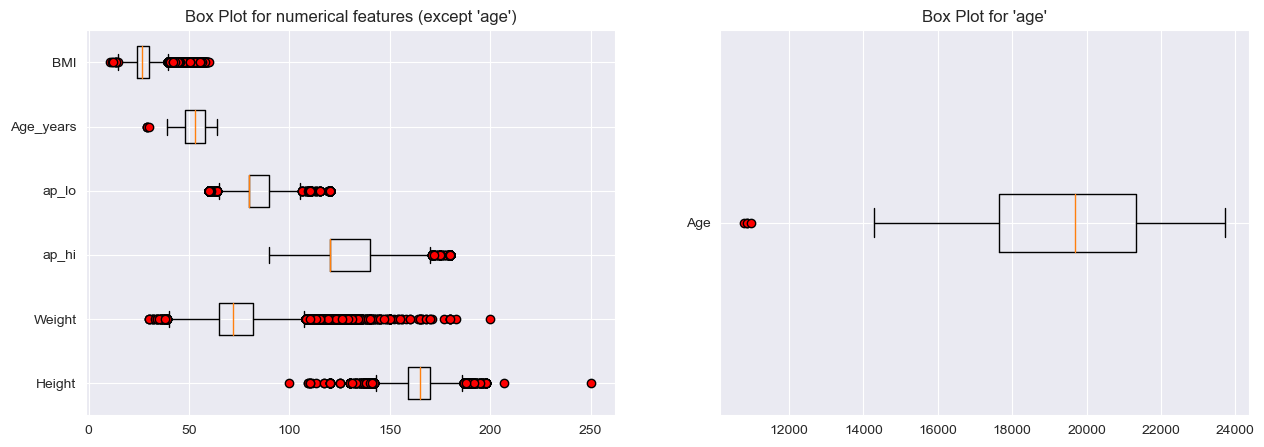

In [887]:
# Create a new figure for the box plots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Box plots for features (except 'age') with outliers displayed (using IQR method)
axs[0].boxplot([df['height'], df['weight'], df['ap_hi'], df['ap_lo'], df['age_years'], df['bmi']], labels=['Height', 'Weight', 'ap_hi', 'ap_lo', 'Age_years', 'BMI'], vert=False, flierprops=dict(markerfacecolor='red', marker='o'))

# Box plot for the 'age' feature with outliers displayed (using IQR method)
axs[1].boxplot(df['age'], labels=['Age'], vert=False, flierprops=dict(markerfacecolor='red', marker='o'))

# Set titles for the subplots
axs[0].set_title("Box Plot for numerical features (except 'age')")
axs[1].set_title("Box Plot for 'age'")

plt.show()

---

#### ◉ Distribution Histograms of Numerical Features

This step generates distribution histograms for various numerical features in the DataFrame. The histograms visually depict the distribution patterns of each numerical feature. They provide an overview of the frequency and concentration of values, aiding in the understanding of the data's characteristics.

##### Steps:

1. **Create Histograms for Each Feature:**
- Histograms are created for each numerical feature ('height', 'weight', 'ap_lo', 'ap_hi', 'bmi', 'age', 'age_years') using the `hist` function.

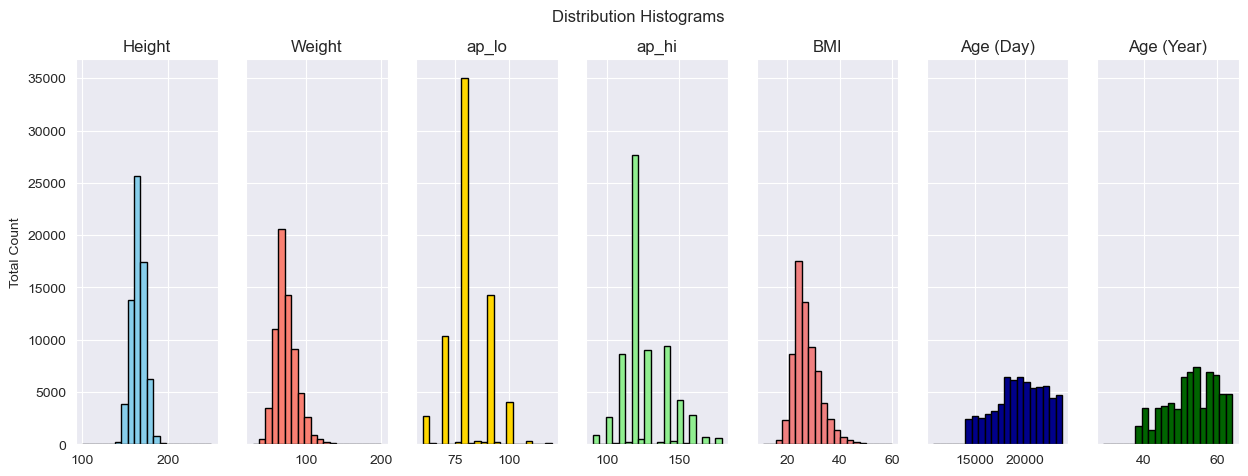

In [888]:
# Setting up a subplot with 1 row and 7 columns
fig, axs = plt.subplots(1, 7, figsize=(15, 5), sharey=True)

# Create histograms for each feature and add them to the subplot
axs[0].hist(df['height'], bins=20, color='skyblue', edgecolor='black')
axs[1].hist(df['weight'], bins=20, color='salmon', edgecolor='black')
axs[2].hist(df['ap_lo'], bins=20, color='gold', edgecolor='black')
axs[3].hist(df['ap_hi'], bins=20, color='lightgreen', edgecolor='black')
axs[4].hist(df['bmi'], bins=20, color='lightcoral', edgecolor='black')
axs[5].hist(df['age'], bins=20, color='darkblue', edgecolor='black')
axs[6].hist(df['age_years'], bins=20, color='darkgreen', edgecolor='black')

# Set titles for the subplots
axs[0].set_title("Height")
axs[1].set_title("Weight")
axs[2].set_title("ap_lo")
axs[3].set_title("ap_hi")
axs[4].set_title("BMI")
axs[5].set_title("Age (Day)")
axs[6].set_title("Age (Year)")

# Set common y-axis label
axs[0].set_ylabel("Total Count")

# Set common title for the entire figure
plt.suptitle("Distribution Histograms")

plt.show()

---

#### ◉ Identifying Outliers in Numerical Features using IQR Method

This step defines a function (`num_outliers_IQR`) to identify outliers in numerical features of a DataFrame using the Interquartile Range (IQR) method. It then applies this function to specific numerical features ('age_years', 'height', 'weight', 'bmi', 'ap_hi', 'ap_lo') in the DataFrame. The IQR method is commonly used to detect outliers by considering the spread of the middle 50% of the data.

##### Steps:
1. **Loop Through Each Feature:**
- The function iterates through each specified numerical feature in the DataFrame.

2. **Calculate Percentiles and IQR:**
- For each feature, it calculates the 25th and 75th percentiles (Q1 and Q3) and then computes the Interquartile Range (IQR).

3. **Define Outlier Step:**
- The outlier step is defined as 1.5 times the IQR.

4. **Identify Outliers:**
- Outliers are identified by finding data points outside the range of (Q1 - outlier_step) to (Q3 + outlier_step).

5. **Print Outlier Information:**
- For each feature, the function prints the feature name and the number of identified outliers.


In [889]:
# Function to identify outliers in numerical features using IQR method
def num_outliers_IQR(df_out, drop=False):
    # Loop through each feature in the DataFrame
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]

        # Calculate the 25th and 75th percentiles (Q1 and Q3)
        Q1 = np.percentile(feature_data, 25.)
        Q3 = np.percentile(feature_data, 75.)

        # Calculate the Interquartile Range (IQR)
        IQR = Q3 - Q1

        # Define the outlier step as 1.5 times the IQR
        outlier_step = IQR * 1.5

        # Identify the indices of outliers
        outliers = feature_data[~((feature_data >= Q1 - outlier_step) & (feature_data <= Q3 + outlier_step))].index.tolist()

        print('Feature: {} | Number of Outliers: {}'.format(each_feature, len(outliers)))

# Identify outliers for the numerical features in the DataFrame
num_outliers_IQR(df[['age_years', 'height', 'weight', 'bmi', 'ap_hi', 'ap_lo']])

Feature: age_years | Number of Outliers: 4
Feature: height | Number of Outliers: 457
Feature: weight | Number of Outliers: 1678
Feature: bmi | Number of Outliers: 1923
Feature: ap_hi | Number of Outliers: 644
Feature: ap_lo | Number of Outliers: 3184


---

#### ◉ Data Transformations for Outlier Mitigation

This step applies data transformations, specifically logarithmic (log) transformation and StandardScaler transformation, to reduce the impact of extreme values and improve the distribution of numerical features in the DataFrame. Logarithmic transformation helps in handling skewed data, while StandardScaler transformation standardizes the features, making them comparable and reducing sensitivity to extreme values.

##### Steps:

1. **Apply Logarithmic Transformation:**
- Logarithmic transformation is applied to selected numerical features ('height', 'weight', 'bmi') in 'df_log'. This transformation is effective in mitigating the impact of extreme values and achieving a more normalized distribution.

2. **Apply StandardScaler Transformation:**
- StandardScaler transformation is applied to the same numerical features ('height', 'weight', 'bmi') in 'df_std'. This transformation standardizes the features by scaling them to have a mean of 0 and a standard deviation of 1.

3. **Identify Outliers in Transformed Features:**
- The function 'num_outliers_IQR' is used to identify and print the number of outliers in the transformed numerical features for both 'df_log' and 'df_std'. Outlier identification after transformations provides insights into the effectiveness of the applied methods in mitigating extreme values.


In [890]:
# Create a copy of the DataFrame to modify without affecting the original
df_log = df.copy()
df_std = df.copy()

# Apply the logarithm transformation on the numerical features
df_log[['height', 'weight', 'bmi']] = np.log(df_log[['height', 'weight', 'bmi']])

# Apply the StandardScalar transformation on the numerical features
scaler = StandardScaler()
# scaler = RobustScaler()
# scaler = MinMaxScaler()
df_std[['height', 'weight', 'bmi']] = scaler.fit_transform(df_std[['height', 'weight', 'bmi']])

# Identify outliers in the transformed numerical features
print('Number of outliers in numerical features after applying logarithm transformation:')
num_outliers_IQR(df_log[['age_years', 'height', 'weight', 'bmi']])
print('________________________________________________________________')
print('Number of outliers in numerical features after applying StandardScaler transformation:')
num_outliers_IQR(df_std[['age_years', 'height', 'weight', 'bmi']])

Number of outliers in numerical features after applying logarithm transformation:
Feature: age_years | Number of Outliers: 4
Feature: height | Number of Outliers: 427
Feature: weight | Number of Outliers: 1075
Feature: bmi | Number of Outliers: 1055
________________________________________________________________
Number of outliers in numerical features after applying StandardScaler transformation:
Feature: age_years | Number of Outliers: 4
Feature: height | Number of Outliers: 457
Feature: weight | Number of Outliers: 1678
Feature: bmi | Number of Outliers: 1923


---

#### ◉ Removing Outliers from Log Transformed DataFrame

This step aims to remove outliers from the DataFrame ('df_log') after applying a logarithmic transformation to specific numerical features ('weight', 'height', 'bmi'). The removal is performed using quantile-based filtering. Removing outliers post-logarithmic transformation helps in creating a more robust dataset for analysis. It is crucial to not to excessively trim the dataset, as it may lead to information loss.

##### Steps:
1. **Quantile-Based Filtering:**
- For each transformed feature ('weight', 'height', 'bmi'), outliers are identified and removed based on quantile thresholds (0.005 and 0.995).

2. **Outlier Identification:**
- The function 'num_outliers_IQR' is used to print the number of outliers in the remaining numerical features after outlier removal.


In [891]:
# Removing outliers from the log transformed Dataframe
# df_log = df_log[(df_log['age_years'] > df_log['age_years'].quantile(0.005)) & (df_log['age_years'] < df_log['age_years'].quantile(0.995))]
df_log = df_log[(df_log['weight'] > df_log['weight'].quantile(0.005)) & (df_log['weight'] < df_log['weight'].quantile(0.995))]
df_log = df_log[(df_log['height'] > df_log['height'].quantile(0.005)) & (df_log['height'] < df_log['height'].quantile(0.995))]
df_log = df_log[(df_log['bmi'] > df_log['bmi'].quantile(0.005)) & (df_log['bmi'] < df_log['bmi'].quantile(0.995))]
# df_log = df_log[(df_log['ap_lo'] > df_log['ap_lo'].quantile(0.005)) & (df_log['ap_lo'] < df_log['ap_lo'].quantile(0.995))]
# df_log = df_log[(df_log['ap_hi'] > df_log['ap_hi'].quantile(0.005)) & (df_log['ap_hi'] < df_log['ap_hi'].quantile(0.995))]
num_outliers_IQR(df_log[['age_years', 'height', 'weight', 'bmi']])
print('________________________________________________________________')
print('Total data samples: {} | Variables (Features + Label): {}'.format(df_log.shape[0], df_log.shape[1]))

Feature: age_years | Number of Outliers: 4
Feature: height | Number of Outliers: 0
Feature: weight | Number of Outliers: 470
Feature: bmi | Number of Outliers: 251
________________________________________________________________
Total data samples: 65926 | Variables (Features + Label): 18


---

#### ◉ Removing Outliers from StandardScaler Transformed DataFrame:

This step removes outliers from the DataFrame ('df_std') after applying the StandardScaler transformation to specific numerical features ('weight', 'height', 'bmi'). Outliers are dropped using quantile-based filtering. Removing outliers post-StandardScaler transformation contributes to creating a more robust and standardized dataset, enhancing the effectiveness of subsequent analyses. It is crucial to not to excessively trim the dataset, as it may lead to information loss.

##### Steps:
1. **Quantile-Based Filtering:**
- For each transformed feature ('weight', 'height', 'bmi'), outliers are identified and removed based on quantile thresholds (0.005 and 0.995).

2. **Outlier Identification:**
- The function 'num_outliers_IQR' is utilized to print the number of outliers in the remaining numerical features after outlier removal.

In [892]:
# Removing outliers from the StandardScaler transformed Dataframe
# df_std = df_std[(df_std['age_years'] > df_std['age_years'].quantile(0.005)) & (df_std['age_years'] < df_std['age_years'].quantile(0.995))]
df_std = df_std[(df_std['weight'] > df_std['weight'].quantile(0.005)) & (df_std['weight'] < df_std['weight'].quantile(0.995))]
df_std = df_std[(df_std['height'] > df_std['height'].quantile(0.005)) & (df_std['height'] < df_std['height'].quantile(0.995))]
df_std = df_std[(df_std['bmi'] > df_std['bmi'].quantile(0.005)) & (df_std['bmi'] < df_std['bmi'].quantile(0.995))]
# df_std = df_std[(df_std['ap_lo'] > df_std['ap_lo'].quantile(0.005)) & (df_std['ap_lo'] < df_std['ap_lo'].quantile(0.995))]
# df_std = df_std[(df_std['ap_hi'] > df_std['ap_hi'].quantile(0.005)) & (df_std['ap_hi'] < df_std['ap_hi'].quantile(0.995))]
num_outliers_IQR(df_std[['age_years', 'height', 'weight', 'bmi']])
print('________________________________________________________________')
print('Total data samples: {} | Variables (Features + Label): {}'.format(df_std.shape[0], df_std.shape[1]))

Feature: age_years | Number of Outliers: 4
Feature: height | Number of Outliers: 0
Feature: weight | Number of Outliers: 1196
Feature: bmi | Number of Outliers: 1211
________________________________________________________________
Total data samples: 65926 | Variables (Features + Label): 18


---

#### ◉ Data Integrity Handling in Log Transformed Dataset

This step focuses on the application of log transformation to the dataset and addresses specific data integrity issues related to blood pressure values ('ap_hi' and 'ap_lo'). The log-transformed DataFrame 'df_log' is utilized for subsequent analysis. Log transformation is chosen over standard scaling to handle extreme values with minimal data loss

##### Steps:

1. **Data Integrity Handling:**
- A check is performed to ensure that systolic blood pressure ('ap_hi') is greater than or equal to diastolic blood pressure ('ap_lo'). This is crucial as the difference (Pulse Pressure) cannot be negative.

2. **Handling Outliers in Blood Pressure Values:**
- Outliers related to blood pressure values are identified. Outliers are defined based on known health standards for blood pressure.
- Systolic blood pressure ('ap_hi') outliers are considered beyond 200, below 80, while diastolic blood pressure ('ap_lo') outliers are considered beyond 140, below 50.

3. **Defining a Reasonable Value Range for Blood Pressure:**
- Values of 'ap_hi' and 'ap_lo' are restricted to a reasonable range based on established health standards.
- Systolic blood pressure ('ap_hi') is considered reasonable between 80 and 200.
- Diastolic blood pressure ('ap_lo') is considered reasonable between 50 and 140.

##### Source:
   - [High Blood Pressure - nih.gov](https://www.nia.nih.gov/health/high-blood-pressure/high-blood-pressure-and-older-adults#:~:text=Normal%20blood%20pressure%20for%20most,pressure%20of%20less%20than%2080)


In [893]:
# Handling Data Integrity
print('Number of data samples where ap_hi is less than ap_lo (Error): {} '.format(len(df_log[df_log['ap_hi'] < df_log['ap_lo']])))
df_log = df_log[df_log['ap_hi'] >= df_log['ap_lo']].reset_index(drop=True)
print('Total data samples after removing cases where ap_hi is less than ap_lo: {} | Variables (Features + Label): {}'.format(df_log.shape[0], df_log.shape[1]))

# Handling Outliers in Blood Pressure Values
print('Total outliers related to ap_lo and ap_hi values: {}'.format(len(df_log[(df_log["ap_hi"]>200) | (df_log["ap_lo"]>140) | (df_log["ap_hi"]<80) | (df_log["ap_lo"]<50)])))

# Defining a Reasonable Value Range for ap_hi and ap_lo
df_log = df_log[(df_log["ap_hi"]<=200) & (df_log["ap_lo"]<=140)]
df_log = df_log[(df_log["ap_hi"]>=80) & (df_log["ap_lo"]>=50)]

print('Total data samples after defining the reasonable value range for ap_hi and ap_lo: {} | Variables (Features + Label): {}'.format(df_log.shape[0], df_log.shape[1]))
df_log.head()

Number of data samples where ap_hi is less than ap_lo (Error): 3 
Total data samples after removing cases where ap_hi is less than ap_lo: 65923 | Variables (Features + Label): 18
Total outliers related to ap_lo and ap_hi values: 0
Total data samples after defining the reasonable value range for ap_hi and ap_lo: 65923 | Variables (Features + Label): 18


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category_Elevated,bp_category_Hypertension Stage 1,bp_category_Hypertension Stage 2,bp_category_Normal
0,18393,2,5.123964,4.127134,110,80,1,1,0,0,1,0,50,3.089547,0,1,0,0
1,20228,1,5.049856,4.442651,140,90,3,1,0,0,1,1,55,3.553280,0,0,1,0
2,18857,1,5.105945,4.158883,130,70,3,1,0,0,0,1,51,3.157333,0,1,0,0
3,17623,2,5.129899,4.406719,150,100,1,1,0,0,1,1,48,3.357262,0,0,1,0
4,17474,1,5.049856,4.025352,100,60,1,1,0,0,0,0,47,3.135980,0,0,0,1


In [894]:
print('Final data samples: {} | Number of features: {}'.format(df_log.shape[0], df.shape[1]))

Final data samples: 65923 | Number of features: 18


---

#### ◉ Preprocessing Summary

This step summarizes the preprocessing steps applied to the dataset, including the removal of missing records, duplicates, outliers, and out-of-range values in specific features. The preprocessing steps have resulted in a cleaned dataset with 65,443 data samples and minimal data loss has been incurred during the process. The table provides a clear overview of the impact of each preprocessing step on the dataset.

| Preprocessing                                  | Remaining Data samples | Lost data samples |
|------------------------------------------------|:----------------------:|------------------:|
| Removing missing records                       |         68205          |                 0 |
| Removing duplicates records                    |         68181          |                24 |
| Removing Outliers                              |         65446          |              2738 |
| Handling data integrity (ap_hi < ap_lo case)   |         65443          |                 3 |
| Removing out of range values (ap_hi and ap_lo) |         65443          |                 0 |


---

# Data Analysis
#### ◉ Numerical features

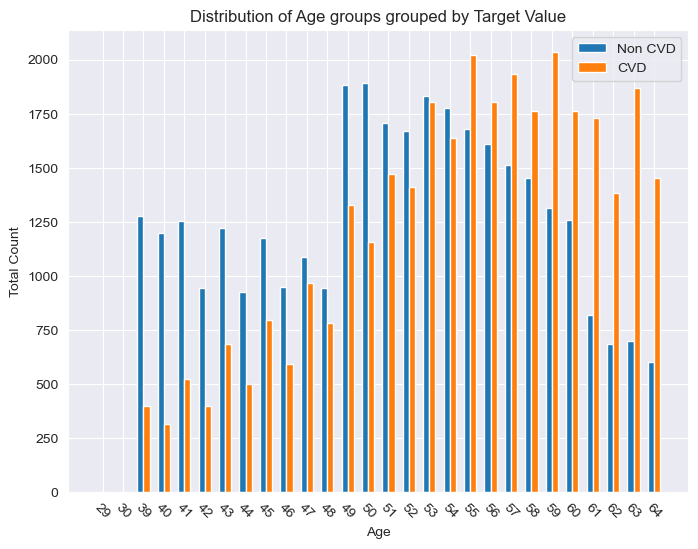

In [895]:
# Data
non_cvd_data = df_log[df_log['cardio'] == 0]['age_years'].value_counts().sort_index()
cvd_data = df_log[df_log['cardio'] == 1]['age_years'].value_counts().sort_index()

# Make sure both datasets have the same index
merged_index = non_cvd_data.index.union(cvd_data.index)

# Reindex the datasets
non_cvd_data = non_cvd_data.reindex(merged_index, fill_value=0)
cvd_data = cvd_data.reindex(merged_index, fill_value=0)

# Bar positions and width
bar_positions = np.arange(len(merged_index))
bar_width = 0.3

# Create the bar plot
plt.bar(bar_positions - bar_width/2, non_cvd_data.values, bar_width, label='Non CVD')
plt.bar(bar_positions + bar_width/2, cvd_data.values, bar_width, label='CVD')

plt.xlabel('Age')
plt.ylabel('Total Count')
plt.title('Distribution of Age groups grouped by Target Value')
plt.xticks(bar_positions, merged_index, rotation=-45)
plt.legend()
plt.show()

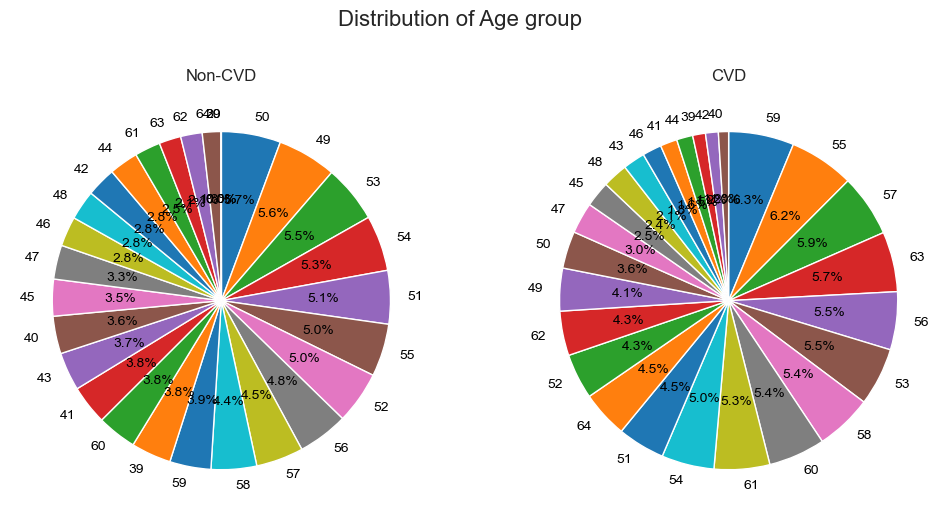

In [896]:
# Data for Non-CVD
non_cvd_data = df_log[df_log['cardio'] == 0]['age_years'].value_counts()

# Data for CVD
cvd_data = df_log[df_log['cardio'] == 1]['age_years'].value_counts()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Non-CVD
axs[0].pie(non_cvd_data, labels=non_cvd_data.index, autopct='%1.1f%%', startangle=90, counterclock=False, textprops={'color': 'black'})
axs[0].set_title("Non-CVD")

# Plot for CVD
axs[1].pie(cvd_data, labels=cvd_data.index, autopct='%1.1f%%', startangle=90, counterclock=False, textprops={'color': 'black'})
axs[1].set_title("CVD")

plt.suptitle("Distribution of Age group", fontsize=16)
plt.show()

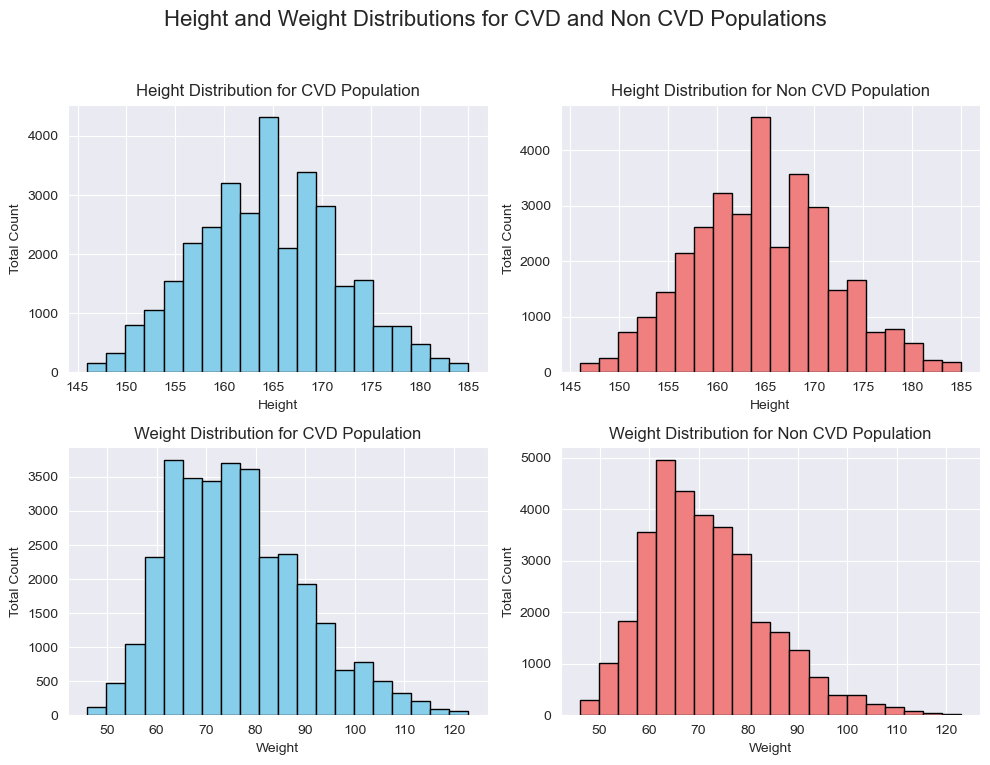

In [897]:
# Data
cvd_height = np.exp(df_log[df_log['cardio'] == 1]['height'])
non_cvd_height = np.exp(df_log[df_log['cardio'] == 0]['height'])
cvd_weight = np.exp(df_log[df_log['cardio'] == 1]['weight'])
non_cvd_weight = np.exp(df_log[df_log['cardio'] == 0]['weight'])

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle("Height and Weight Distributions for CVD and Non CVD Populations", fontsize=16)

# Height Distribution for CVD Population
axs[0, 0].hist(cvd_height, bins=20, color='skyblue', edgecolor='black')
axs[0, 0].set_title("Height Distribution for CVD Population")
axs[0, 0].set_xlabel("Height")
axs[0, 0].set_ylabel("Total Count")

# Height Distribution for Non CVD Population
axs[0, 1].hist(non_cvd_height, bins=20, color='lightcoral', edgecolor='black')
axs[0, 1].set_title("Height Distribution for Non CVD Population")
axs[0, 1].set_xlabel("Height")
axs[0, 1].set_ylabel("Total Count")

# Weight Distribution for CVD Population
axs[1, 0].hist(cvd_weight, bins=20, color='skyblue', edgecolor='black')
axs[1, 0].set_title("Weight Distribution for CVD Population")
axs[1, 0].set_xlabel("Weight")
axs[1, 0].set_ylabel("Total Count")

# Weight Distribution for Non CVD Population
axs[1, 1].hist(non_cvd_weight, bins=20, color='lightcoral', edgecolor='black')
axs[1, 1].set_title("Weight Distribution for Non CVD Population")
axs[1, 1].set_xlabel("Weight")
axs[1, 1].set_ylabel("Total Count")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

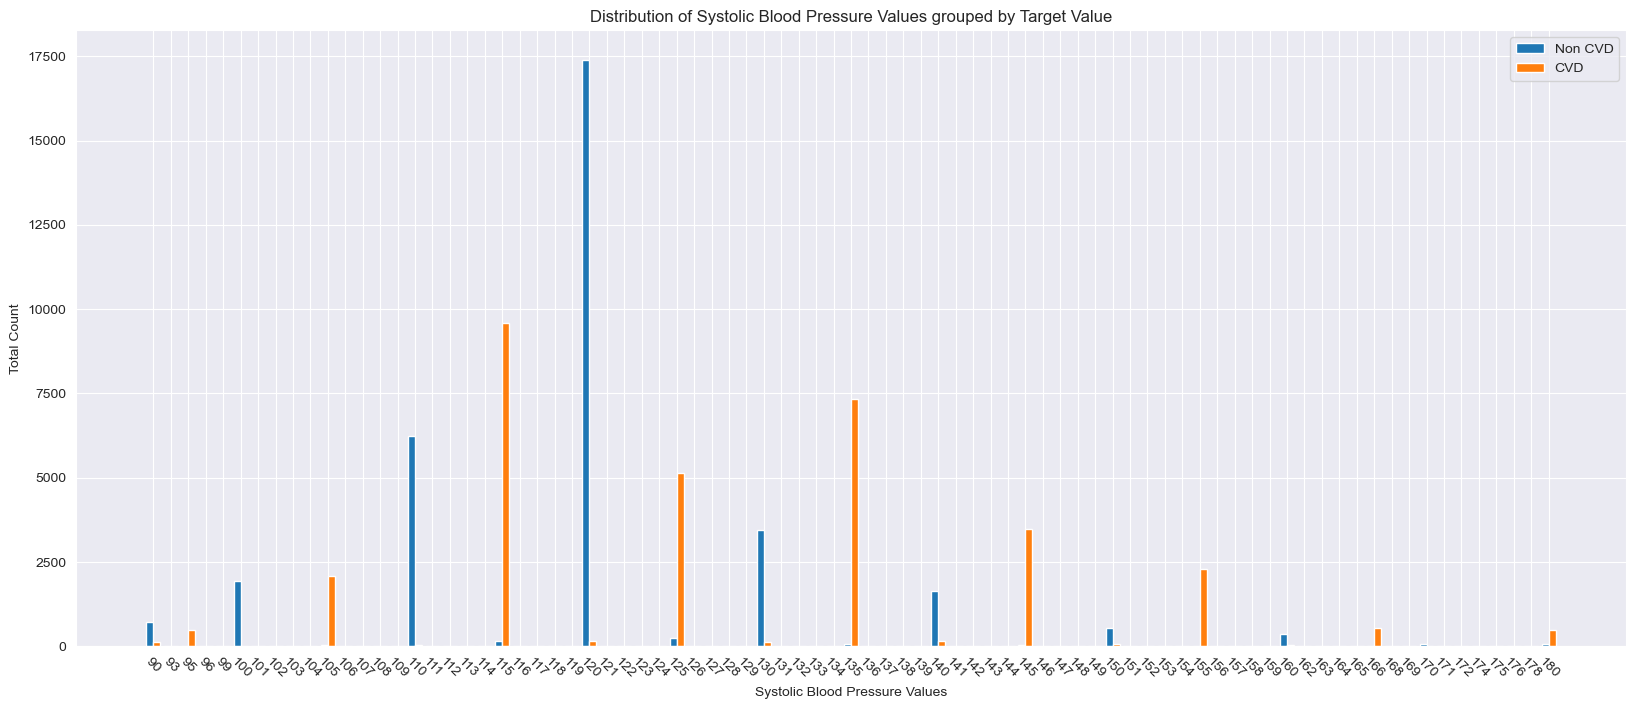

In [898]:
# Data
non_cvd_ap_hi_counts = df_log[df_log['cardio'] == 0]['ap_hi'].value_counts().sort_index()
cvd_ap_hi_counts = df_log[df_log['cardio'] == 1]['ap_hi'].value_counts().sort_index()

# Bar positions and width
bar_positions = range(len(non_cvd_ap_hi_counts))
bar_width = 0.4

# Create the grouped bar chart
plt.figure(figsize=(20, 8))
plt.bar(bar_positions, non_cvd_ap_hi_counts, bar_width, label='Non CVD')
plt.bar([pos + bar_width for pos in bar_positions], cvd_ap_hi_counts, bar_width, label='CVD')

# Set labels and title
plt.xlabel('Systolic Blood Pressure Values')
plt.ylabel('Total Count')
plt.title('Distribution of Systolic Blood Pressure Values grouped by Target Value')
plt.xticks([pos + bar_width/2 for pos in bar_positions], non_cvd_ap_hi_counts.index, rotation=-45)
plt.legend()

plt.show()

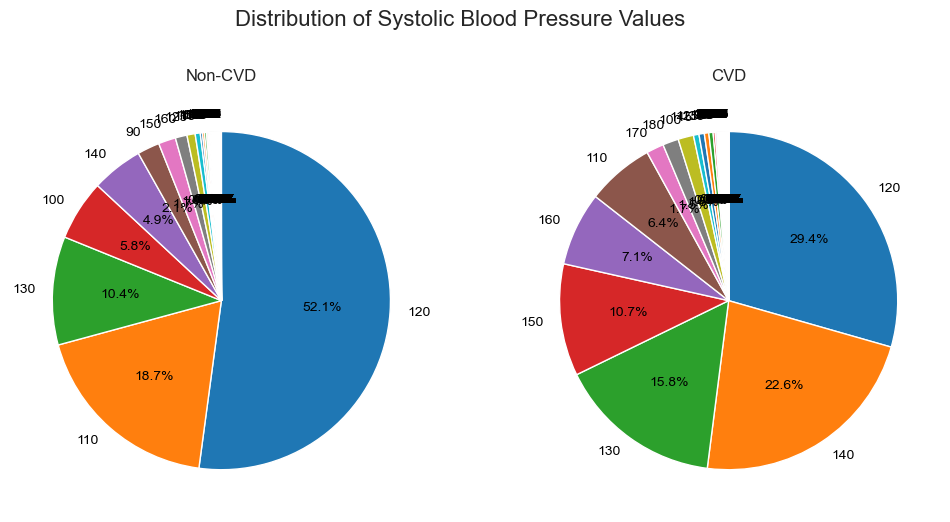

In [899]:
# Data for Non-CVD
non_cvd_ap_hi_counts = df_log[df_log['cardio'] == 0]['ap_hi'].value_counts()

# Data for CVD
cvd_ap_hi_counts = df_log[df_log['cardio'] == 1]['ap_hi'].value_counts()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Non-CVD
axs[0].pie(non_cvd_ap_hi_counts, labels=non_cvd_ap_hi_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, textprops={'color': 'black'})
axs[0].set_title("Non-CVD")

# Plot for CVD
axs[1].pie(cvd_ap_hi_counts, labels=cvd_ap_hi_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, textprops={'color': 'black'})
axs[1].set_title("CVD")

plt.suptitle("Distribution of Systolic Blood Pressure Values", fontsize=16)
plt.show()

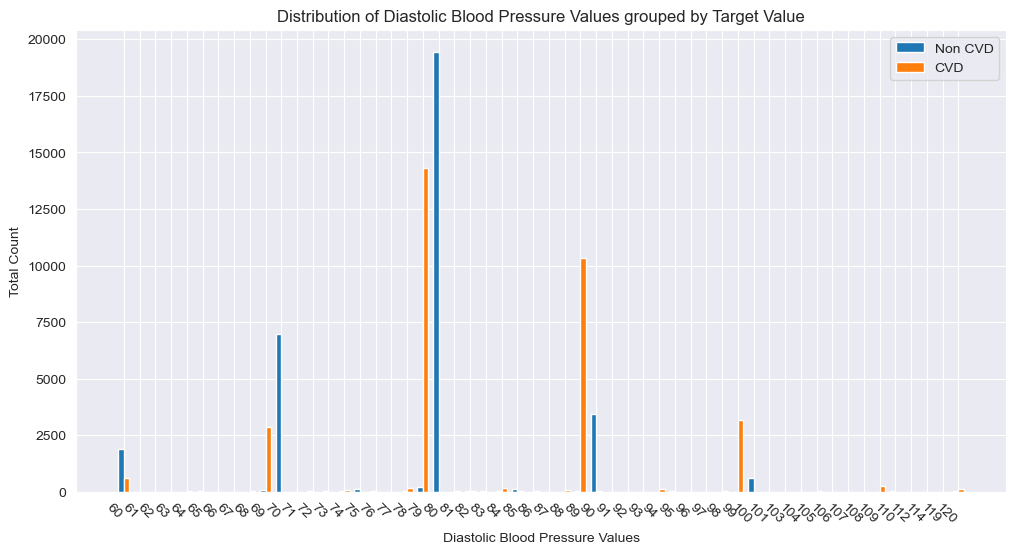

In [900]:
# Data
non_cvd_ap_lo_counts = df_log[df_log['cardio'] == 0]['ap_lo'].value_counts().sort_index()
cvd_ap_lo_counts = df_log[df_log['cardio'] == 1]['ap_lo'].value_counts().sort_index()

# Bar positions
bar_positions = range(len(non_cvd_ap_lo_counts))

# Bar width
bar_width = 0.35

# Create the grouped bar chart
plt.figure(figsize=(12, 6))
plt.bar(bar_positions, non_cvd_ap_lo_counts, bar_width, label='Non CVD')
plt.bar([pos + bar_width for pos in bar_positions], cvd_ap_lo_counts, bar_width, label='CVD')

# Set labels and title
plt.xlabel('Diastolic Blood Pressure Values')
plt.ylabel('Total Count')
plt.title('Distribution of Diastolic Blood Pressure Values grouped by Target Value')
plt.xticks([pos + bar_width/2 for pos in bar_positions], non_cvd_ap_lo_counts.index, rotation=-45, ha='right')  # Adjust rotation and horizontal alignment
plt.legend()

plt.show()

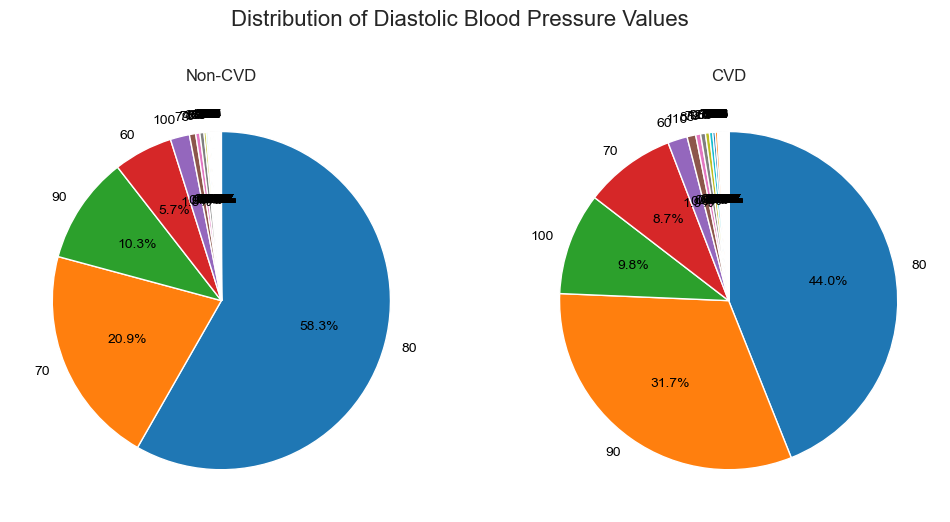

In [901]:

# Data for Non-CVD
non_cvd_ap_lo_counts = df_log[df_log['cardio'] == 0]['ap_lo'].value_counts()

# Data for CVD
cvd_ap_lo_counts = df_log[df_log['cardio'] == 1]['ap_lo'].value_counts()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Non-CVD
axs[0].pie(non_cvd_ap_lo_counts, labels=non_cvd_ap_lo_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, textprops={'color': 'black'})
axs[0].set_title("Non-CVD")

# Plot for CVD
axs[1].pie(cvd_ap_lo_counts, labels=cvd_ap_lo_counts.index, autopct='%1.1f%%', startangle=90, counterclock=False, textprops={'color': 'black'})
axs[1].set_title("CVD")

plt.suptitle("Distribution of Diastolic Blood Pressure Values", fontsize=16)
plt.show()

**Categorical features**

In [902]:
Categorical_features = [feature for feature in df_log.columns if len(df_log[feature].unique())<5]
print('Categorical features : {}'.format(Categorical_features))
print('________________________________________________________________')
print('Number of categories in each categorical feature:')
for each_feature in Categorical_features:
    print('{}:  {} | {}'.format(each_feature, len(df_log[each_feature].unique()), df_log[each_feature].unique()))

Categorical features : ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'bp_category_Elevated', 'bp_category_Hypertension Stage 1', 'bp_category_Hypertension Stage 2', 'bp_category_Normal']
________________________________________________________________
Number of categories in each categorical feature:
gender:  2 | [2 1]
cholesterol:  3 | [1 3 2]
gluc:  3 | [1 2 3]
smoke:  2 | [0 1]
alco:  2 | [0 1]
active:  2 | [1 0]
cardio:  2 | [0 1]
bp_category_Elevated:  2 | [0 1]
bp_category_Hypertension Stage 1:  2 | [1 0]
bp_category_Hypertension Stage 2:  2 | [0 1]
bp_category_Normal:  2 | [0 1]


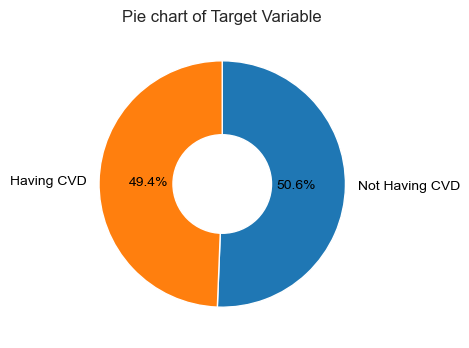

In [903]:
# Data
cardio_counts = df_log['cardio'].value_counts()

# Create a pie chart
plt.figure(figsize=(4, 4))
plt.pie(cardio_counts, labels=['Not Having CVD', 'Having CVD'], autopct='%1.1f%%', startangle=90, counterclock=False, textprops={'color': 'black'})

# Set title and add a white circle in the center to create a donut chart
plt.title("Pie chart of Target Variable")
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

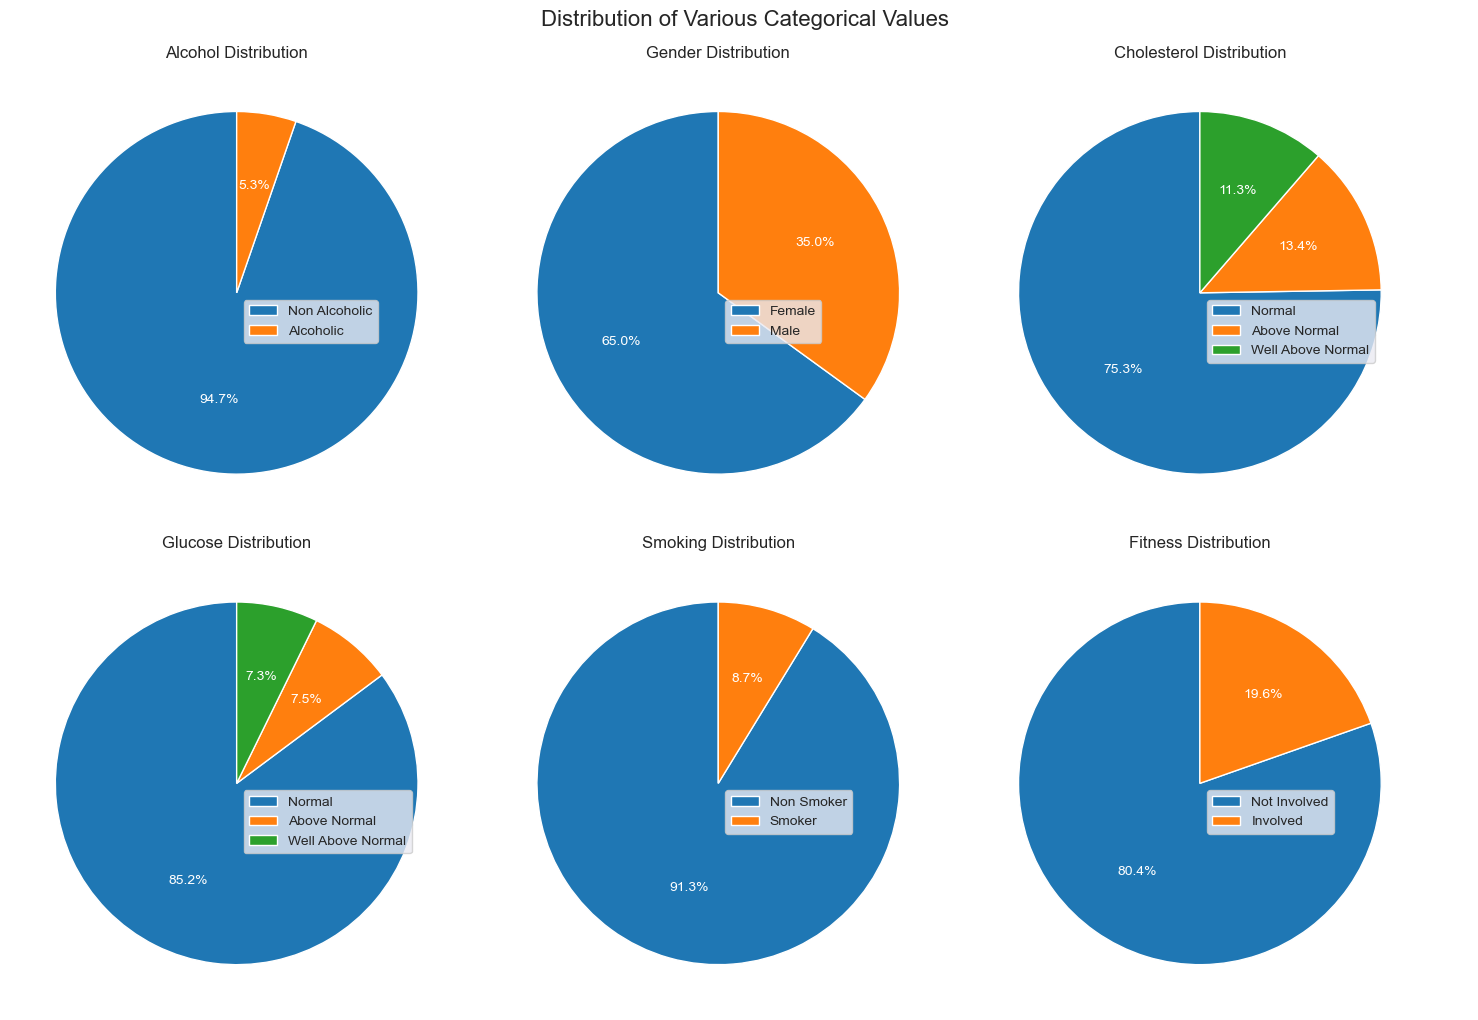

In [904]:
# Create subplots for 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot Alcohol Distribution
alco_counts = df_log['alco'].value_counts()
axes[0, 0].pie(alco_counts, labels=['Non Alcoholic', 'Alcoholic'], autopct='%1.1f%%', startangle=90, textprops={'color': 'white'})
axes[0, 0].set_title('Alcohol Distribution')
axes[0, 0].legend(labels=['Non Alcoholic', 'Alcoholic'], loc='upper left', bbox_to_anchor=(0.5, 0.5))

# Plot Gender Distribution
gender_counts = df_log['gender'].value_counts()
axes[0, 1].pie(gender_counts, labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90, textprops={'color': 'white'})
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].legend(labels=['Female', 'Male'], loc='upper left', bbox_to_anchor=(0.5, 0.5))

# Plot Cholesterol Distribution
cholesterol_counts = df_log['cholesterol'].value_counts()
axes[0, 2].pie(cholesterol_counts, labels=['Normal', 'Above Normal', 'Well Above Normal'], autopct='%1.1f%%', startangle=90, textprops={'color': 'white'})
axes[0, 2].set_title('Cholesterol Distribution')
axes[0, 2].legend(labels=['Normal', 'Above Normal', 'Well Above Normal'], loc='upper left', bbox_to_anchor=(0.5, 0.5))

# Plot Glucose Distribution
gluc_counts = df_log['gluc'].value_counts()
axes[1, 0].pie(gluc_counts, labels=['Normal', 'Above Normal', 'Well Above Normal'], autopct='%1.1f%%', startangle=90, textprops={'color': 'white'})
axes[1, 0].set_title('Glucose Distribution')
axes[1, 0].legend(labels=['Normal', 'Above Normal', 'Well Above Normal'], loc='upper left', bbox_to_anchor=(0.5, 0.5))

# Plot Smoking Distribution
smoke_counts = df_log['smoke'].value_counts()
axes[1, 1].pie(smoke_counts, labels=['Non Smoker', 'Smoker'], autopct='%1.1f%%', startangle=90, textprops={'color': 'white'})
axes[1, 1].set_title('Smoking Distribution')
axes[1, 1].legend(labels=['Non Smoker', 'Smoker'], loc='upper left', bbox_to_anchor=(0.5, 0.5))

# Plot Fitness Distribution
active_counts = df_log['active'].value_counts()
axes[1, 2].pie(active_counts, labels=['Not Involved', 'Involved'], autopct='%1.1f%%', startangle=90, textprops={'color': 'white'})
axes[1, 2].set_title('Fitness Distribution')
axes[1, 2].legend(labels=['Not Involved', 'Involved'], loc='upper left', bbox_to_anchor=(0.5, 0.5))

plt.tight_layout()
plt.suptitle('Distribution of Various Categorical Values', fontsize=16, y=1.02)
plt.show()

# PCA

In [905]:
# Extract the 'cardio' column as the label
label = df_log['cardio']

# Drop the 'cardio' column from the DataFrame to perform PCA on the remaining features
df_log_pca = df_log.drop(['cardio'], axis=1)

# Standardize the data using StandardScaler
scaled_data = StandardScaler().fit_transform(df_log_pca)

# Apply PCA with 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Stack the PCA components and label to create a new DataFrame
pca_data = np.vstack((pca_data.T, label)).T

# Create a DataFrame with PCA components and the label
pca_df = pd.DataFrame(data=pca_data, columns=('first', 'second', 'label'))

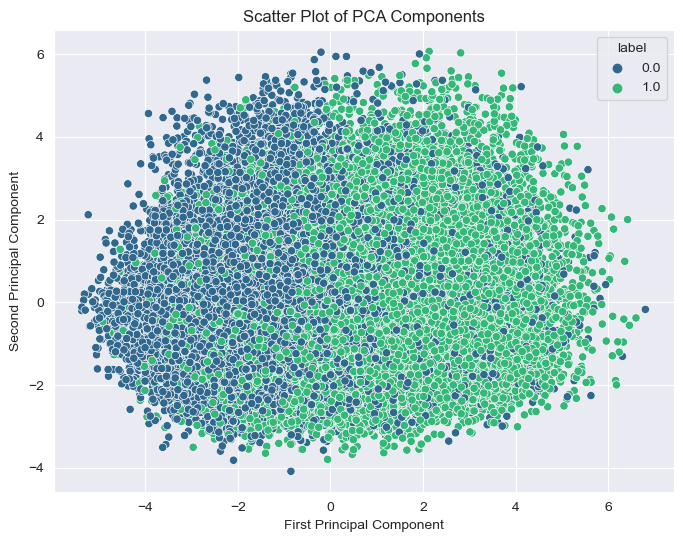

In [906]:
# Assuming pca_df is a DataFrame with columns 'first', 'second', and 'label'

# Create a scatter plot using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(x='first', y='second', hue='label', palette='viridis', data=pca_df, legend='full')

# Set plot title and labels
plt.title('Scatter Plot of PCA Components')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

plt.show()

# Feature Selection

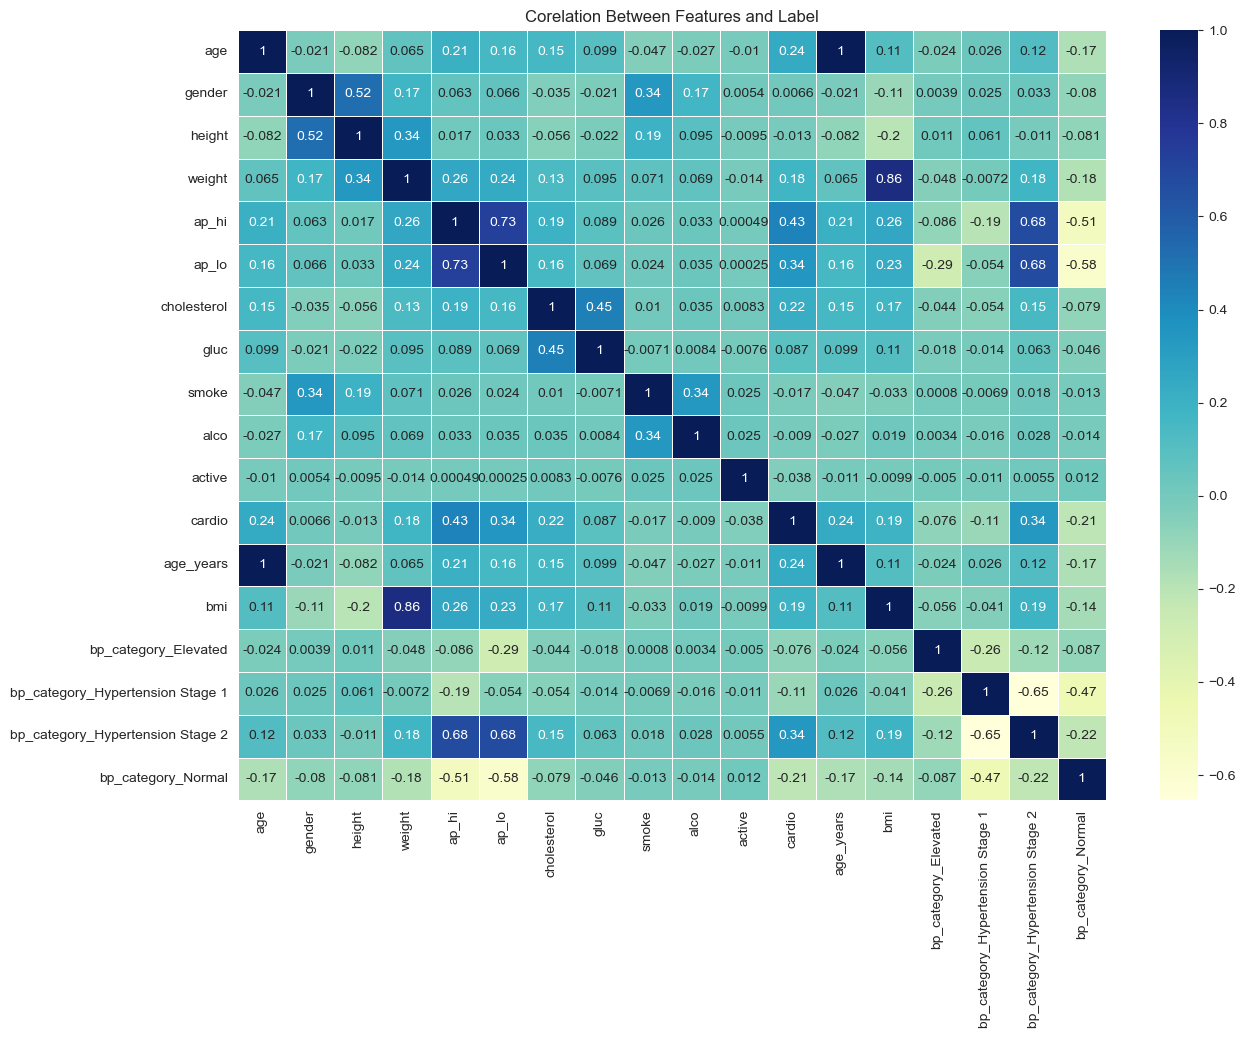

In [907]:
plt.rcParams['figure.figsize'] = (14, 10)
sns.heatmap(df_log.corr(), annot = True, linewidths=.5, cmap="YlGnBu")
plt.title('Corelation Between Features and Label', fontsize = 12)
plt.show()

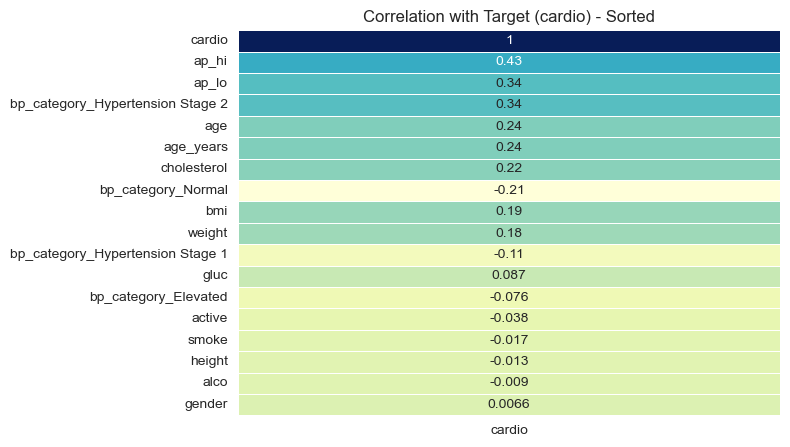

In [908]:
plt.rcParams['figure.figsize'] = (7, 5)

# Extracting correlations with the label 'cardio'
target_correlation = df_log.corr()['cardio']

# Sorting features based on their correlation values in descending order
sorted_features = target_correlation.abs().sort_values(ascending=False)

# Displaying a heatmap for sorted target correlations
sns.heatmap(df_log[sorted_features.index].corr()['cardio'].to_frame(), annot=True, linewidths=.5, cmap="YlGnBu", cbar=False)
plt.title('Correlation with Target (cardio) - Sorted', fontsize=12)
plt.show()

In [909]:
plt.rcParams['figure.figsize'] = (20, 15)

# Extracting correlations between features
feature_correlation = df_log.corr().abs()

# Setting diagonal elements to NaN to exclude self-correlations
np.fill_diagonal(feature_correlation.values, np.nan)

# Finding the feature with the strongest correlation for each feature (excluding itself)
strongest_correlations = feature_correlation.idxmax()
correlation_values = feature_correlation.max()

# Creating a table
table_data = pd.DataFrame({
    'Feature': feature_correlation.index,
    'Strongest Correlation': strongest_correlations.values,
    'Correlation Value': correlation_values.values
})

print(table_data)

                             Feature             Strongest Correlation  \
0                                age                         age_years   
1                             gender                            height   
2                             height                            gender   
3                             weight                               bmi   
4                              ap_hi                             ap_lo   
5                              ap_lo                             ap_hi   
6                        cholesterol                              gluc   
7                               gluc                       cholesterol   
8                              smoke                              alco   
9                               alco                             smoke   
10                            active                            cardio   
11                            cardio                             ap_hi   
12                         age_years  

C:\Users\Home\AppData\Local\Temp\ipykernel_7416\218019975.py:13: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
  correlation_values = feature_correlation.lookup(feature_correlation.index, strongest_correlations)


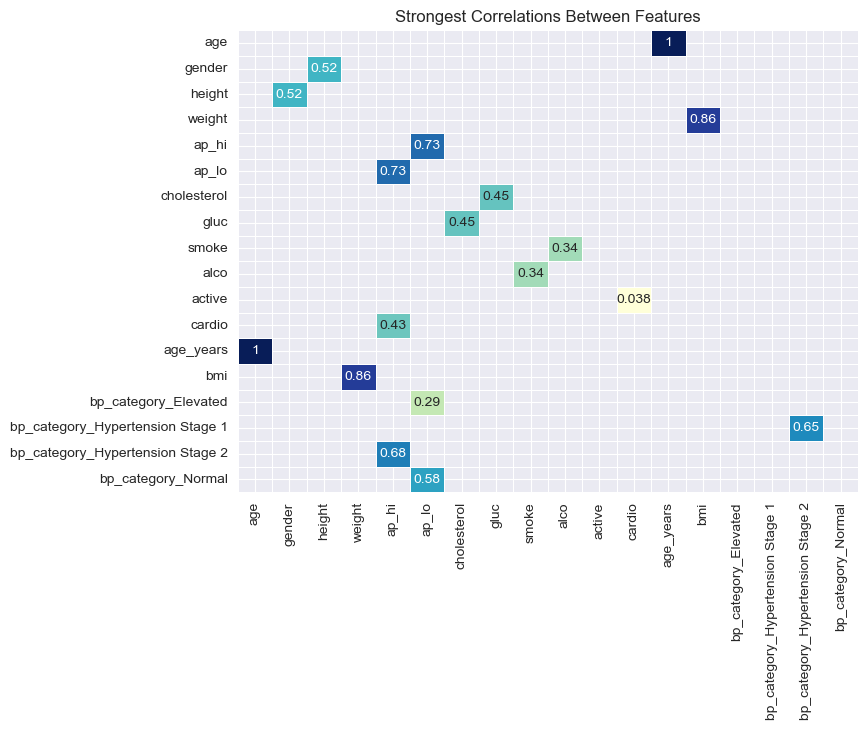

In [910]:
plt.rcParams['figure.figsize'] = (8, 6)

# Extracting correlations between features
feature_correlation = df_log.corr().abs()

# Setting diagonal elements to NaN to exclude self-correlations
np.fill_diagonal(feature_correlation.values, np.nan)

# Finding the feature with the strongest correlation for each feature (excluding itself)
strongest_correlations = feature_correlation.idxmax()

# Extracting the correlation values for the strongest correlations
correlation_values = feature_correlation.lookup(feature_correlation.index, strongest_correlations)

# Creating a DataFrame to represent the heatmap data
heatmap_data = pd.DataFrame(index=feature_correlation.index, columns=feature_correlation.columns)

# Filling the DataFrame with the correlation values for the strongest correlations
for feature, strongest_corr, corr_value in zip(feature_correlation.index, strongest_correlations, correlation_values):
    heatmap_data.loc[feature, strongest_corr] = corr_value

sns.heatmap(heatmap_data.astype(float), annot=True, linewidths=.5, cmap="YlGnBu", cbar=False)
plt.title('Strongest Correlations Between Features', fontsize=12)
plt.show()

In [911]:
df_log = df_log.drop(['age', 'gender', 'alco'], axis =1)

In [912]:
df_log['pulse_pressure'] = df_log['ap_hi'] - df_log['ap_lo']
# Applying log transformation to 'age_years' and 'pulse_pressure', handling zero or negative values
df_log[['age_years', 'pulse_pressure']] = np.log1p(df_log[['age_years', 'pulse_pressure']])
df_log = df_log.drop(['ap_lo', 'ap_hi', 'weight'], axis =1)

# Feature Engineering

# Dataset Splitting and Feature Scaling

In [913]:
df_log

,height,cholesterol,gluc,smoke,active,cardio,age_years,bmi,bp_category_Elevated,bp_category_Hypertension Stage 1,bp_category_Hypertension Stage 2,bp_category_Normal,pulse_pressure
0,5.123964,1,1,0,1,0,3.931826,3.089547,0,1,0,0,3.433987
1,5.049856,3,1,0,1,1,4.025352,3.553280,0,0,1,0,3.931826
2,5.105945,3,1,0,0,1,3.951244,3.157333,0,1,0,0,4.110874
3,5.129899,1,1,0,1,1,3.891820,3.357262,0,0,1,0,3.931826
4,5.049856,1,1,0,0,0,3.871201,3.135980,0,0,0,1,3.713572
...,...,...,...,...,...,...,...,...,...,...,...,...,...
65918,5.105945,1,1,0,1,1,4.060443,3.380476,0,1,0,0,4.262680
65919,5.123964,1,1,1,1,0,3.970292,3.293146,0,1,0,0,3.713572
65920,5.209486,3,1,0,0,1,3.970292,3.445328,0,0,1,0,4.510860
65921,5.093750,1,2,0,0,1,4.127134,3.299506,0,1,0,0,4.025352


In [914]:
# data-label separation
labels = df_log['cardio'].to_numpy()
df_log_processed = df_log.drop(columns=['cardio'])
# convert to numpy
data = df_log_processed.to_numpy()
# train-test split
trainx, testx, trainy, testy = train_test_split(data, labels, test_size=0.15, random_state=42)

In [915]:
# normalization
scaler = StandardScaler()
# scaler = RobustScaler()
# scaler = MinMaxScaler()
# Fit the scaler on the training data and transform both the training and test data
trainx = scaler.fit_transform(trainx)
testx = scaler.transform(testx)

# Machine Learning Models

In [916]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
model = LogisticRegression()

# Train the model on the training set
model.fit(trainx, trainy)

# Make predictions on the test set
testy_pred = model.predict(testx)

# Evaluate the model
accuracy = accuracy_score(testy, testy_pred)
report = classification_report(testy, testy_pred)

# Print the results
print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7199919102032561
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.80      0.74      4975
           1       0.76      0.64      0.70      4914

    accuracy                           0.72      9889
   macro avg       0.72      0.72      0.72      9889
weighted avg       0.72      0.72      0.72      9889

